# **Abstract**
Liver cirrhosis is a prevalent health concern, particularly in North America, attributable to elevated alcohol consumption. The objective of this project is to develop a predictive model for liver cirrhosis based on an individual's lifestyle and health conditions. The disease is categorized into four stages:

Stage 1: Normal

Stage 2: Fatty Liver

Stage 3: Liver Fibrosis

Stage 4: Liver Cirrhosis

The primary goal is to accurately predict the specific stage of liver cirrhosis based on a dataset comprising both numerical and categorical features related to an individual's lifestyle and health.

**Objective:**-
 To compare and contrast different methods of model interpretability by analyzing the results obtained from fitting a linear model, a tree-based model, and utilizing automated machine learning (AutoML), and subsequently applying SHAP (SHapley Additive exPlanations) analysis to each model.

In [1]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv -O cirrhosis_github.csv

# Import pandas
import pandas as pd

# Load the downloaded CSV file into a pandas DataFrame
data = pd.read_csv('cirrhosis_github.csv')

# Display the first few rows of the DataFrame
print(data.head())

--2024-03-17 22:17:53--  https://raw.githubusercontent.com/Vinay1289Sai/DSMT1_Vinay/main/cirrhosis_github.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30700 (30K) [text/plain]
Saving to: ‘cirrhosis_github.csv’

cirrhosis_github.cs 100%[===================>]  29.98K  --.-KB/s    in 0s      

2024-03-17 22:17:53 (85.1 MB/s) - ‘cirrhosis_github.csv’ saved [30700/30700]

   N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0     400      D  D-penicillamine  21464   F       Y            Y       Y   
1    4500      C  D-penicillamine  20617   F       N            Y       Y   
2    1012      D  D-penicillamine  25594   M       N            N       N   
3    1925      D  D-penicillamine  19994   F       N            Y       Y   
4    1

In [2]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [139]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


# Drop rows with missing target values
data = data.dropna(subset=['Stage'])

# Separate features and target variable
X = data.drop('Stage', axis=1)
y = data['Stage']

# Handling missing values and encoding categorical variables
# For numerical features
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='mean')
X_numerical = num_imputer.fit_transform(X[numerical_columns])

# For categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = cat_imputer.fit_transform(X[categorical_columns])
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical_imputed)

# Combine numerical and categorical features
X_preprocessed = np.hstack((X_numerical, X_categorical_encoded.toarray()))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set (optional, for evaluation)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("MSE:", mse)



Coefficients: [[ 4.58522075e-04 -6.88588597e-05 -1.12457139e-04 -9.95200706e-04
  -3.26647568e-05  1.43131306e-03 -4.98338145e-05 -6.74306870e-03
  -7.94250089e-03  3.16867219e-03 -2.72461027e-05  1.29393663e-04
  -7.27225927e-05 -8.55557871e-05  2.13515009e-04 -2.42399727e-04
  -8.89094282e-05  6.00247111e-05 -1.06137755e-05 -1.82709416e-05
   1.62326060e-04 -1.91210777e-04  8.66711844e-05 -1.15555902e-04
  -4.81414496e-06 -5.48234885e-06 -1.85882233e-05]
 [ 2.27264233e-04 -1.53942228e-05 -1.53428379e-04  5.31662760e-04
  -3.92913857e-04 -3.76110647e-03 -1.04270688e-04  1.58922719e-03
  -7.87114010e-04  1.47208389e-03 -1.51718793e-03  3.11112467e-05
  -9.62029937e-06 -1.16966141e-04  3.65110524e-04 -4.60585717e-04
  -1.52376109e-04  5.69009154e-05 -4.56808303e-05 -4.97943634e-05
   2.28361746e-04 -3.23836940e-04  4.11727007e-04 -5.07202201e-04
   1.24719305e-04 -1.36466499e-04 -8.37279999e-05]
 [-2.87505443e-05 -1.63949836e-05 -2.46035761e-03  1.11869463e-03
   8.39196279e-04 -4.81325

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


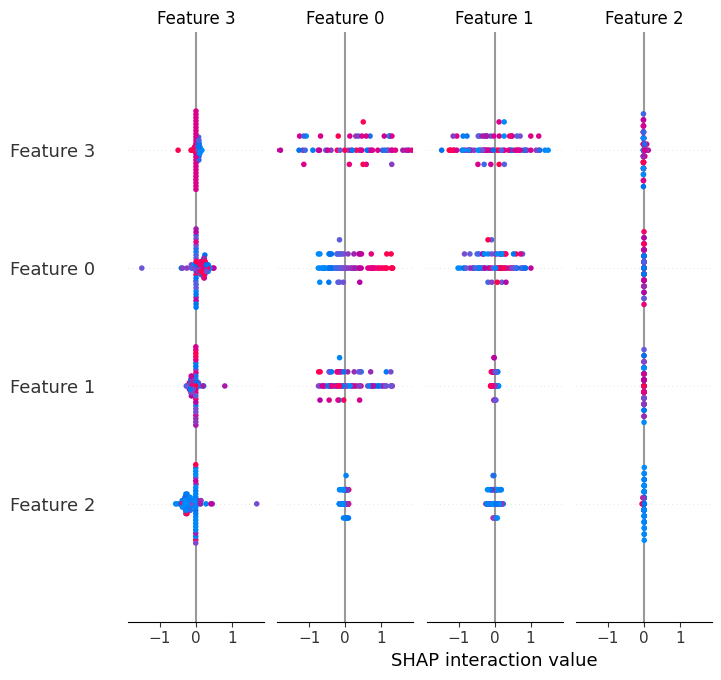

SHAP values: [[ 1.16843910e-01  5.79131148e-02 -7.32642153e-03 -1.67430603e-01]
 [ 1.16061774e-02  2.59469996e-03  2.76337844e-03 -1.69642558e-02]
 [ 1.93114650e-05  2.63471650e-05  4.22499723e-04 -4.68158353e-04]
 [ 4.53311308e-02 -2.42170991e-02 -5.09562468e-02  2.98422151e-02]
 [-1.49057550e-06 -1.79296534e-05  3.82946495e-05 -1.88744206e-05]
 [ 1.46172332e-02 -3.84101646e-02 -4.91552139e-03  2.87084528e-02]
 [-4.46531609e-03 -9.34308529e-03  6.20810251e-03  7.60029888e-03]
 [ 2.31151358e-02 -5.44784635e-03 -5.96191490e-03 -1.17053745e-02]
 [ 4.38365172e-02  4.34426604e-03 -2.75543142e-02 -2.06264691e-02]
 [ 4.72469074e-02  2.19497023e-02 -3.41540595e-03 -6.57812037e-02]
 [ 5.28044361e-07  2.94039314e-05  1.36050422e-05 -4.35370179e-05]
 [ 2.15448243e-05  5.18021000e-06  9.00308401e-05 -1.16755874e-04]
 [ 3.91650590e-06  5.18105280e-07  2.44341880e-06 -6.87802997e-06]
 [ 9.63791096e-06  1.31763062e-05  4.48709108e-05 -6.76851280e-05]
 [-1.39942368e-05 -2.39301355e-05  1.74806439e-05

In [142]:
#SHAP for logistic Regression
import shap

# Ensure data is in the correct format
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Initialize the SHAP explainer with the linear model
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot of the SHAP values
# If you have feature names, replace `None` with the list of feature names
feature_names = None  # or your list of feature names, e.g., ['feature1', 'feature2', ...]
shap.summary_plot(shap_values.values, X_test, feature_names=feature_names)

# Print the average of the SHAP values as an estimate of feature importance
print("SHAP values:", shap_values.values.mean(axis=0))



In [150]:
#Decision Tree - Random Forest
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.4578313253012048


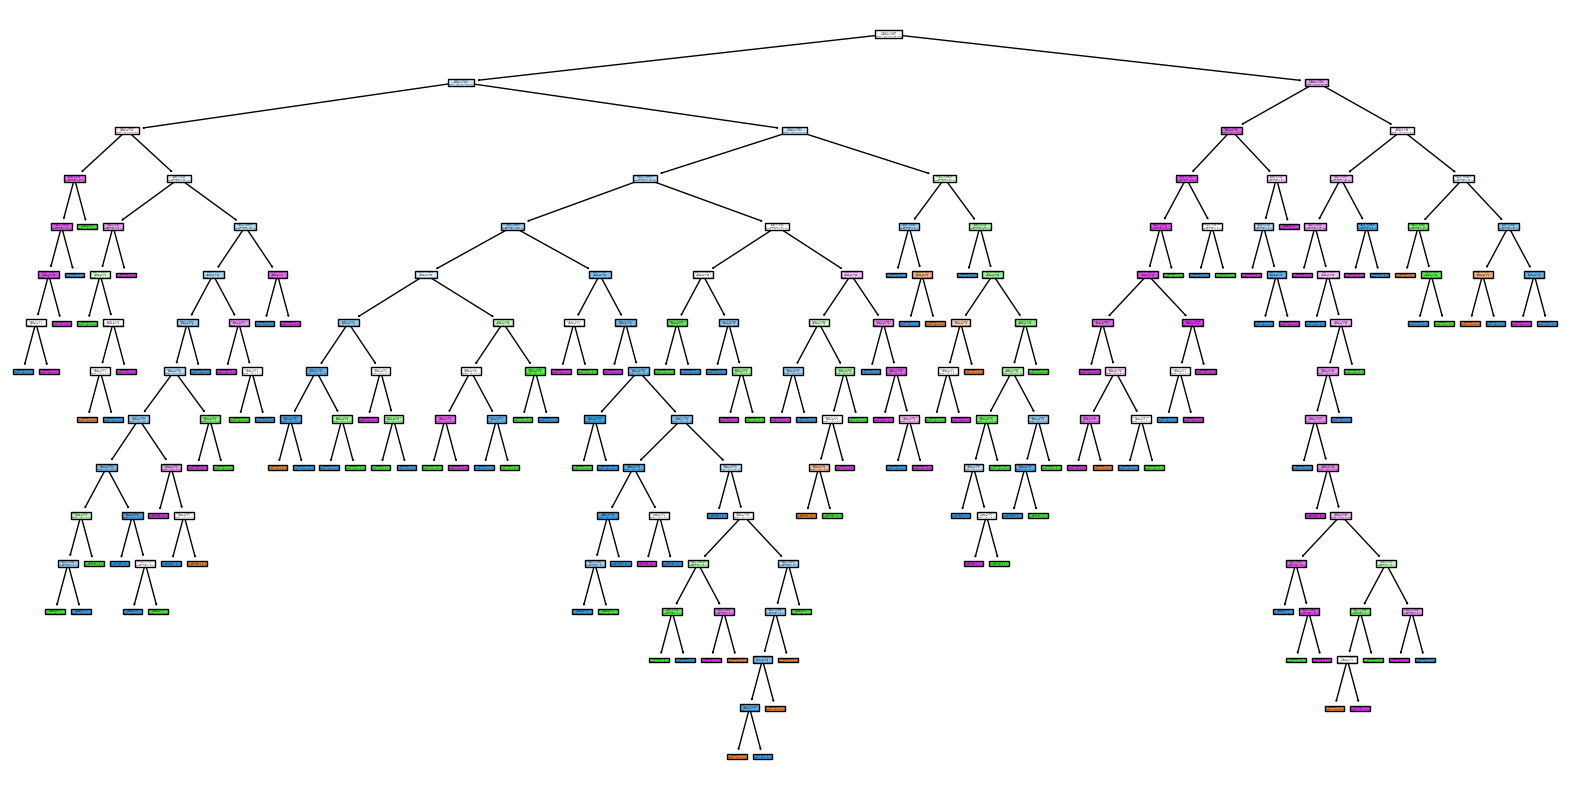

In [145]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()



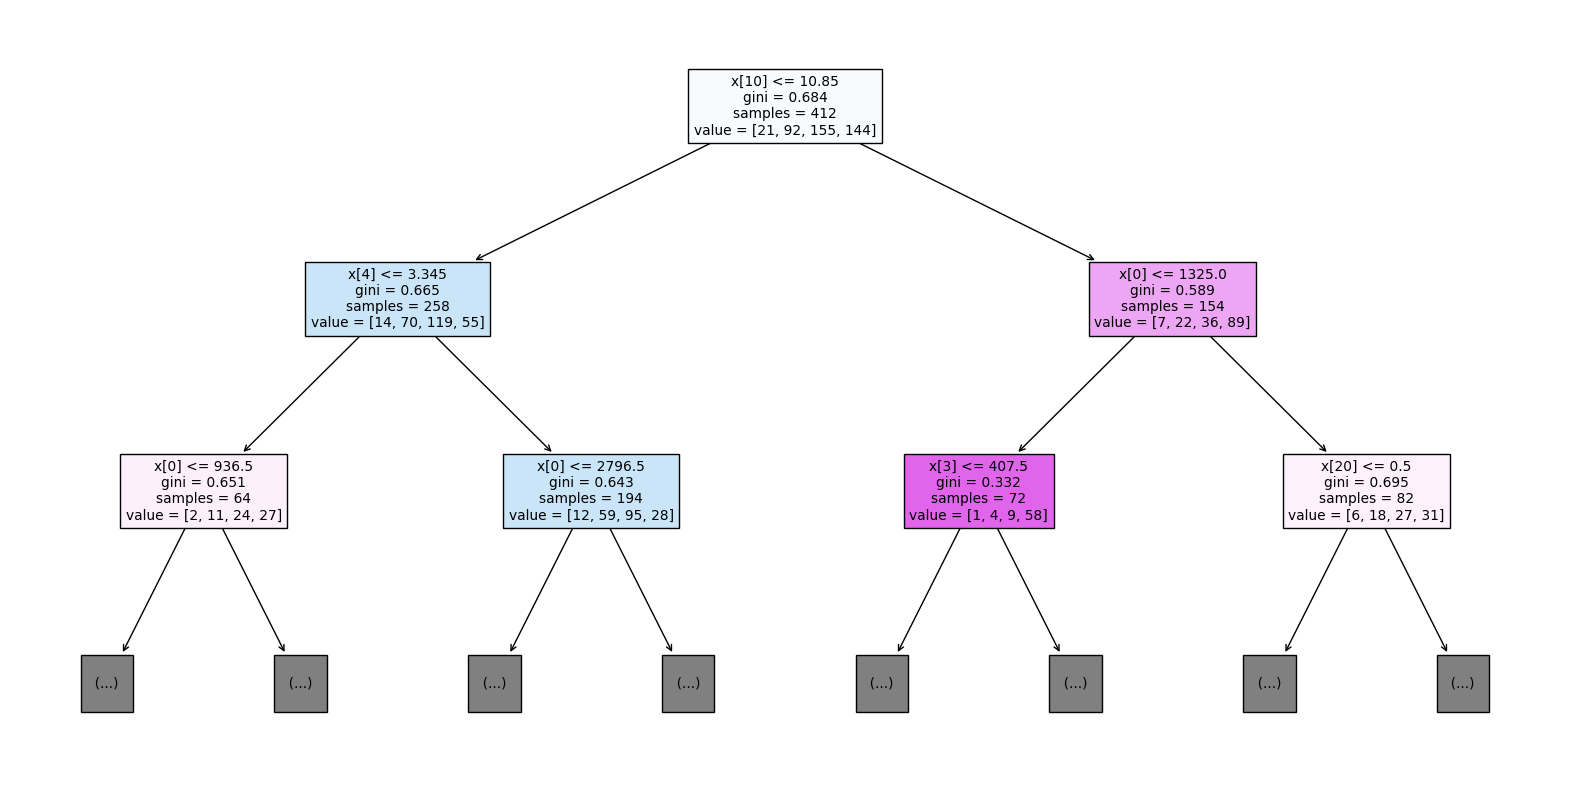

In [151]:
from sklearn import tree
import matplotlib.pyplot as plt

# Define the maximum depth for visualization
max_depth = 2  # Adjust this value as needed

plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True, max_depth=max_depth)
plt.show()


In [45]:
#AutoML
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.9 MB/s eta 0:00:00


In [133]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O server
h2o.init(max_mem_size="4G")  # Adjust memory size based on your machine's capabilities

# Convert the pandas DataFrame to an H2OFrame
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Specify the target and predictors
target = 'Stage'  # Assuming 'Stage' is the column name of the target variable in your dataset
predictors = [name for name in h2o_train.columns if name != target]

# Run H2O AutoML
automl = H2OAutoML(
    max_runtime_secs=3600,  # 1 hour; adjust based on how long you're willing to wait
    max_models=20,          # Max number of models to build; adjust based on your preference
    seed=42                 # Seed for reproducibility
)
automl.train(x=predictors, y=target, training_frame=h2o_train)

# View the leaderboard of models
leaderboard = automl.leaderboard
print(leaderboard)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 42 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_twvn7z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.994 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20240318_20520     0.720364  0.518924  0.579573  0.203916                  0.518924
StackedEnsemble_BestOfFamily_1_AutoML_2_20240318_20520  0.728398  0.530563  0.585198  0.207051                  0.530563
GBM_grid_1_AutoML_2_20240318_20520_model_2              0.732221  0.536148  0.588754  0.207921                  0.536148
GBM_5_AutoML_2_20240318_20520                           0.735184  0.540496  0.597242  0.208353                  0.540496
GLM_1_AutoML_2_20240318_20520                           0.735326  0.540704  0.595757  0.207783                

In [47]:
# Get the best model
best_model = automl.leader

# Print the model details
print(best_model)

# For tree-based models, you can typically get feature importances directly
if hasattr(best_model, 'varimp'):
    print(best_model.varimp())


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240317_232302


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08361615297740191
RMSE: 0.2891645776671166
MAE: 0.23193921265697406
RMSLE: 0.092445249

In [48]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.0 MB/s eta 0:00:00


In [49]:
pip install --upgrade numpy shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [55]:

shap.initjs()



In [161]:

# Separate features and target variable
X = data.drop(columns=['Stage'])
y = data['Stage'].dropna()  # Ensure target variable has no missing values

# Update X to match y's row indices
X = X.loc[y.index]

# Define categorical and numerical features
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Preprocessing for numerical data: imputation + scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test


(     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
 5      2503      D          Placebo  24201   F       N            Y       N   
 45     2256      D  D-penicillamine  16728   F       N            Y       N   
 407    1086      C              NaN  18628   F     NaN          NaN     NaN   
 398    1260      C              NaN  15341   F     NaN          NaN     NaN   
 118     515      D  D-penicillamine  19817   F       N            N       Y   
 ..      ...    ...              ...    ...  ..     ...          ...     ...   
 71     4184      C          Placebo  11868   F       N            N       N   
 106    3388      C          Placebo  22836   F       N            N       N   
 270    1569      C          Placebo  18435   F       N            Y       N   
 354    2338      C              NaN  14245   F     NaN          NaN     NaN   
 102     110      D          Placebo  17884   F       Y            Y       Y   
 
     Edema  Bilirubin  Cholesterol  Al

In [81]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Now, the pipeline is correctly set up for predictions and evaluations

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [87]:
print("Number of categorical columns:", len(categorical_columns))
print("Number of numerical columns:", len(numerical_columns))
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)



Number of categorical columns: 7
Number of numerical columns: 11
Categorical columns: Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')
Numerical columns: Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')


In [101]:
import pandas as pd

# Create an empty DataFrame with NaN as the index name
nan_frame = pd.DataFrame(index=[float('NaN')])

# Iterate over categorical columns and append them to the DataFrame
for col in categorical_columns:
    nan_frame[col] = None  # or any default value you prefer

# Iterate over numerical columns and append them to the DataFrame
for col in numerical_columns:
    nan_frame[col] = None  # or any default value you prefer

# Now the DataFrame nan_frame contains all columns from both lists with NaN as the index name
nan_frame

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [102]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 4.0


In [104]:
X_test.iloc[0: 1]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
272,1558,C,Placebo,17320,F,N,N,Y,N,2.2,328.0,3.46,75.0,1677.0,87.0,116.0,202.0,9.6


In [105]:
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}, Actual value: {y_test[0]}")

Current Prediction: 3.0, Actual value: 4.0


In [163]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline for the decision tree model
tree_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the model
tree_model_pipeline.fit(X_train, y_train)

# Feature importances from the decision tree model
tree_importances = tree_model_pipeline.named_steps['classifier'].feature_importances_
print(tree_importances)

[0.18815303 0.10462847 0.03714402 0.09288642 0.06534957 0.02693804
 0.06394681 0.04134523 0.06299907 0.11168843 0.06019531 0.
 0.00595675 0.         0.01861483 0.01192469 0.         0.
 0.01087106 0.01171493 0.00765867 0.00714809 0.01066122 0.04528349
 0.         0.0104243  0.         0.         0.         0.00446756
 0.        ]


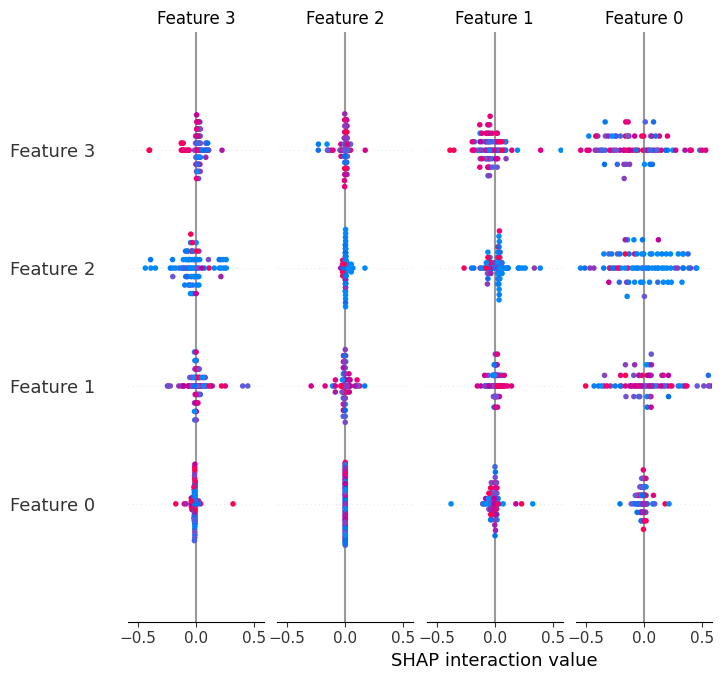

In [164]:
#SHAP for Random Decision Tree
# Transform the training data using the preprocessor from the tree model pipeline
X_train_transformed = tree_model_pipeline.named_steps['preprocessor'].transform(X_train)

# Create a SHAP explainer using the tree model and transformed training data
tree_explainer = shap.Explainer(tree_model_pipeline.named_steps['classifier'], X_train_transformed)

# Calculate SHAP values for the transformed test data
X_test_transformed = tree_model_pipeline.named_steps['preprocessor'].transform(X_test)
tree_shap_values = tree_explainer.shap_values(X_test_transformed)

# Summarize the SHAP values
shap.summary_plot(tree_shap_values, X_test_transformed)

Interpreting SHAP dependence plots for linear and tree-based models allows us to understand how specific features influence model predictions. Here’s how to interpret these plots:

Linear Model:

Slope Direction: The slope indicates whether increasing the feature value positively or negatively affects the prediction.
Slope Steepness: Steeper slopes suggest stronger feature influence on predictions.
Divergence from Linearity: Deviations from linearity may indicate non-linear relationships or feature interactions.
Tree-based Model:

Curve Shape: Curves in the plot imply non-linear relationships between features and predictions.
Vertical Dispersion: Vertical spread suggests varying feature influence based on other features' values.
Color Coding: Color-coded points reveal interactions between features, especially if colors cluster in certain regions.
General Tips:

Feature Importance: Features with larger deviations from baseline predictions are typically more important.
Interactions: For tree-based models, SHAP plots show feature interactions, while linear models require manual interaction specification.
Predictive Insight: Identifying thresholds and patterns in the plots can inform decision-making and further investigation.
Overall, SHAP dependence plots offer valuable insights into model behavior and data relationships, aiding in model interpretation and decision-making.

# **References**
H20.ai- https://docs.h2o.ai/

Logistic Regression- https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,%2Fno%2C%20and%20so%20on.

Random Forest- https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm

Github Link- https://github.com/Vinay1289Sai/DSMT1_Vinay

Dataset- https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

ChatGPT-https://chat.openai.com/

Github(Reference given by professor) - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

MIT License

Copyright (c) 2024 Vinay1289Sai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.